# CLIP Interrogator 2.3 

Want to figure out what a good prompt might be to create new images like an existing one? The CLIP Interrogator is here to get you answers!

<br>

For Stable Diffusion 1.X choose the **ViT-L** model and for Stable Diffusion 2.0+ choose the **ViT-H** CLIP Model.

This version is specialized for producing nice prompts for use with Stable Diffusion and achieves higher alignment between generated text prompt and source image. You can try out the old [version 1](https://colab.research.google.com/github/pharmapsychotic/clip-interrogator/blob/v1/clip_interrogator.ipynb) to see how different CLIP models ranks terms. 

You can also run this on HuggingFace and Replicate<br>
[![Generic badge](https://img.shields.io/badge/🤗-Open%20in%20Spaces-blue.svg)](https://huggingface.co/spaces/pharma/CLIP-Interrogator) [![Replicate](https://replicate.com/pharmapsychotic/clip-interrogator/badge)](https://replicate.com/pharmapsychotic/clip-interrogator)

<br>

If this notebook is helpful to you please consider buying me a coffee via [ko-fi](https://ko-fi.com/pharmapsychotic) or following me on [twitter](https://twitter.com/pharmapsychotic) for more cool Ai stuff. 🙂

And if you're looking for more Ai art tools check out my [Ai generative art tools list](https://pharmapsychotic.com/tools.html).


In [1]:
#@title Check GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-5c3921fb-449a-5735-f3f4-cd626b1aa86c)


In [2]:
#@title Setup
import os, subprocess

def setup():
    install_cmds = [
        ['pip', 'install', 'gradio'],
        ['pip', 'install', 'open_clip_torch'],
        ['pip', 'install', 'clip-interrogator'],
    ]
    for cmd in install_cmds:
        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

setup()


clip_model_name = 'ViT-L-14/openai' #@param ["ViT-L-14/openai", "ViT-H-14/laion2b_s32b_b79k"]


import gradio as gr
from clip_interrogator import Config, Interrogator

config = Config()
config.blip_num_beams = 64
config.blip_offload = False
config.clip_model_name = clip_model_name
ci = Interrogator(config)

def image_analysis(image):
    image = image.convert('RGB')
    image_features = ci.image_to_features(image)

    top_mediums = ci.mediums.rank(image_features, 5)
    top_artists = ci.artists.rank(image_features, 5)
    top_movements = ci.movements.rank(image_features, 5)
    top_trendings = ci.trendings.rank(image_features, 5)
    top_flavors = ci.flavors.rank(image_features, 5)

    medium_ranks = {medium: sim for medium, sim in zip(top_mediums, ci.similarities(image_features, top_mediums))}
    artist_ranks = {artist: sim for artist, sim in zip(top_artists, ci.similarities(image_features, top_artists))}
    movement_ranks = {movement: sim for movement, sim in zip(top_movements, ci.similarities(image_features, top_movements))}
    trending_ranks = {trending: sim for trending, sim in zip(top_trendings, ci.similarities(image_features, top_trendings))}
    flavor_ranks = {flavor: sim for flavor, sim in zip(top_flavors, ci.similarities(image_features, top_flavors))}
    
    return medium_ranks, artist_ranks, movement_ranks, trending_ranks, flavor_ranks

def image_to_prompt(image, mode):
    ci.config.chunk_size = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    ci.config.flavor_intermediate_count = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    image = image.convert('RGB')
    if mode == 'best':
        return ci.interrogate(image)
    elif mode == 'classic':
        return ci.interrogate_classic(image)
    elif mode == 'fast':
        return ci.interrogate_fast(image)
    elif mode == 'negative':
        return ci.interrogate_negative(image)
        

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 769.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 5.8 MB/s eta 0:0

  0%|          | 0.00/1.66G [00:00<?, ?B/s]

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_large_caption.pth
Loading CLIP model...


100%|███████████████████████████████████████| 933M/933M [00:11<00:00, 82.1MiB/s]
ViT-L-14_openai_artists.safetensors: 100%|██████████| 16.2M/16.2M [00:00<00:00, 76.9MB/s]
ViT-L-14_openai_flavors.safetensors: 100%|██████████| 155M/155M [00:01<00:00, 78.3MB/s]
ViT-L-14_openai_mediums.safetensors: 100%|██████████| 146k/146k [00:00<00:00, 17.4MB/s]
ViT-L-14_openai_movements.safetensors: 100%|██████████| 307k/307k [00:00<00:00, 30.3MB/s]
ViT-L-14_openai_trendings.safetensors: 100%|██████████| 111k/111k [00:00<00:00, 21.9MB/s]
ViT-L-14_openai_negative.safetensors: 100%|██████████| 63.2k/63.2k [00:00<00:00, 17.3MB/s]

Loaded CLIP model and data in 28.66 seconds.


In [3]:
#@title Image to prompt! 🖼️ -> 📝
   
def prompt_tab():
    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
            with gr.Column():
                mode = gr.Radio(['best', 'fast', 'classic', 'negative'], label='Mode', value='best')
        prompt = gr.Textbox(label="Prompt")
    button = gr.Button("Generate prompt")
    button.click(image_to_prompt, inputs=[image, mode], outputs=prompt)

def analyze_tab():
    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
        with gr.Row():
            medium = gr.Label(label="Medium", num_top_classes=5)
            artist = gr.Label(label="Artist", num_top_classes=5)        
            movement = gr.Label(label="Movement", num_top_classes=5)
            trending = gr.Label(label="Trending", num_top_classes=5)
            flavor = gr.Label(label="Flavor", num_top_classes=5)
    button = gr.Button("Analyze")
    button.click(image_analysis, inputs=image, outputs=[medium, artist, movement, trending, flavor])

with gr.Blocks() as ui:
    with gr.Tab("Prompt"):
        prompt_tab()
    with gr.Tab("Analyze"):
        analyze_tab()

ui.launch(show_api=False, debug=False)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Mounted at /content/gdrive/


Generating prompts:   0%|          | 0/75 [00:00<?, ?it/s]

a black sports car driving on a track, massive wings, 4k photo gigapixel, by Jim Davis, veneno, new mexico, left - hand drive, photo taken from behind, profile pose, beaten, liquid cooled, h 7 0 4, backfacing, chiron, blurred photo, conquest


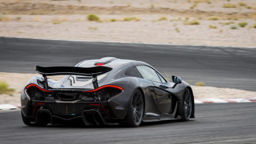

Generating prompts:   1%|▏         | 1/75 [01:06<1:22:13, 66.67s/it]

a yellow and green sports car on a gray background, mclaren, logo without text, most popular, hype-realistic, wings open, profile picture 1024px, but slower in changing, editorial awarded design, with horse driven, npc with a saint's halo, spoon, racers, banknote, official product image, mead


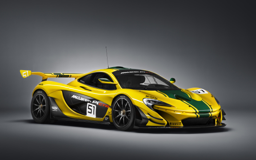

Generating prompts:   3%|▎         | 2/75 [02:08<1:17:21, 63.58s/it]

File a yellow and green sports car on a gray background, mclaren, logo without text, most popular, hype-realistic, wings open, pr.jpg already exists, trying 2...
a black sports car parked in front of a house, audince in awe, giant wings, stretching her legs on the grass, taken with canon eos 5 d, mclaren, grim expression, black facemask, breeding, sapphire, long hook nose, with notes, spoon, wicked


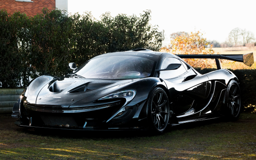

Generating prompts:   4%|▍         | 3/75 [03:01<1:10:40, 58.90s/it]

File a black sports car parked in front of a house, audince in awe, giant wings, stretching her legs on the grass, taken with can.jpg already exists, trying 2...
a black sports car parked in front of a building, trending on deviantart, mclaren, best on wlop, with skin of obsidian, by Jim Davis, ultra - high detail, anonymous as a car, big wings, glowing cyber - eyes, f11:10, anamorphic, magnificent oval face, vantablack, high-definition photograph, weeping tears of black oil


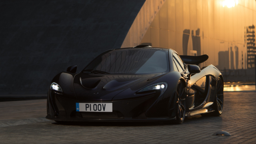

Generating prompts:   5%|▌         | 4/75 [03:59<1:09:24, 58.65s/it]

File a black sports car parked in front of a building, trending on deviantart, mclaren, best on wlop, with skin of obsidian, by J.jpg already exists, trying 2...
a black sports car driving on a track, mclaren, wlop : :, transparent smoke from hell, t 1 0 0, 9 k, featured, azure, an insane, thick black smoke billowing, oman, testing custom, hyperdetailed features, by Daren Bader, hovering in the air, puttin


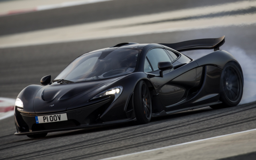

Generating prompts:   7%|▋         | 5/75 [05:00<1:09:27, 59.53s/it]

File a black sports car driving on a track, mclaren, wlop  , transparent smoke from hell, t 1 0 0, 9 k, featured, azure, an insan.jpg already exists, trying 2...
a black sports car driving down a desert road, human machine interface, spotlighting, veneno, flash image, orange light, beautiful panoramic imagery, expansive, stride


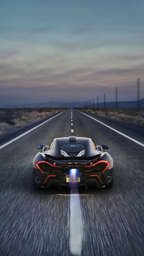

Generating prompts:   8%|▊         | 6/75 [05:37<59:29, 51.73s/it]  

File a black sports car driving down a desert road, human machine interface, spotlighting, veneno, flash image, orange light, bea.jpg already exists, trying 2...
a red sports car driving on a race track, epic video game art, mclaren, rendered on unreal 3 d, golden hour photograph, centered full body rear-shot, photoreal details, awarded winning photo, pearlescent skin, transparent glass surfaces, vlc screenshot, fiery wings, car commercial photograph


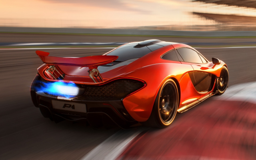

Generating prompts:   9%|▉         | 7/75 [06:27<58:12, 51.36s/it]

File a red sports car driving on a race track, epic video game art, mclaren, rendered on unreal 3 d, golden hour photograph, cent.jpg already exists, trying 2...
a black sports car driving on a track, mclaren, is a stunning, wlop : :, by Victor Wang, insane


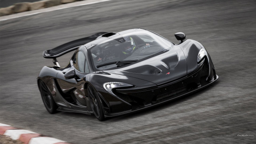

Generating prompts:  11%|█         | 8/75 [07:04<51:58, 46.55s/it]

File a black sports car driving on a track, mclaren, is a stunning, wlop  , by Victor Wang, insane.jpg already exists, trying 2...
a white sports car driving on a desert road, mclaren, trending on artstration, arabian beauty, ultrawide lens”, skyfall, beautiful panoramic imagery, award winning h-512 w-512 n-6, black oled background, featured on unsplash, curves!!, veneno, slow - shutter, 1128x191 resolution


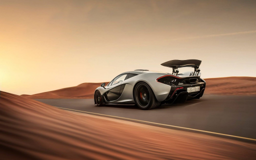

Generating prompts:  12%|█▏        | 9/75 [08:02<55:13, 50.21s/it]

File a white sports car driving on a desert road, mclaren, trending on artstration, arabian beauty, ultrawide lens, skyfall, beau.jpg already exists, trying 2...
a black sports car on a white background, an ultra high definition, highly photographic render, hunched over, mclaren, with skin of obsidian, arnold rendering, long wings, guilloche, breeding, growling, no watermark signature, aliased, flash image, top, full width


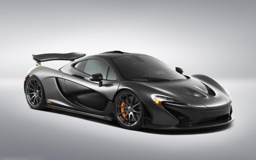

Generating prompts:  13%|█▎        | 10/75 [09:02<57:44, 53.30s/it]

File a black sports car on a white background, an ultra high definition, highly photographic render, hunched over, mclaren, with .jpg already exists, trying 2...
a black and orange sports car driving down a road, unsplash transparent, lorem ipsum dolor sit amet, at takeoff, veneno, by Victor Wang, kneeling at the shiny floor, checkerboard horizon, silver wings, fast paced


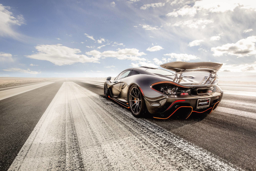

Generating prompts:  15%|█▍        | 11/75 [09:43<52:38, 49.34s/it]

File a black and orange sports car driving down a road, unsplash transparent, lorem ipsum dolor sit amet, at takeoff, veneno, by .jpg already exists, trying 2...
a black and white photo of a sports car, colors of tron legacy, great digital art with details, eon flux, mclaren, phantom, featured on 99designs, blue energy, removed watermarks, ghost neon, inspired by Tony Tuckson


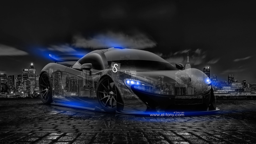

Generating prompts:  16%|█▌        | 12/75 [10:28<50:27, 48.06s/it]

File a black and white photo of a sports car, colors of tron legacy, great digital art with details, eon flux, mclaren, phantom, .jpg already exists, trying 2...
a red sports car driving on a road, high - definition picture, face profile, a digital rendering, veneno, stride, sleek head, full view of face and body, new gods, tangerine dream album cover, listing image, faster


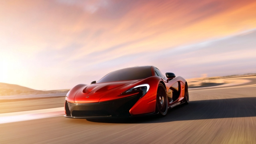

Generating prompts:  17%|█▋        | 13/75 [11:14<49:00, 47.43s/it]

a green sports car sitting on top of a checkered floor, sublime-cool-hot-hyperadvanced, neon ink, mclaren, green crystal


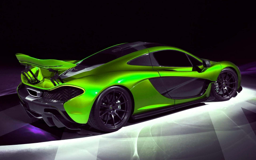

Generating prompts:  19%|█▊        | 14/75 [11:54<46:06, 45.35s/it]

File a green sports car sitting on top of a checkered floor, sublime-cool-hot-hyperadvanced, neon ink, mclaren, green crystal.jpg already exists, trying 2...
a yellow sports car with its doors open, mclaren, highly detailed in 4 k ”, curated collections, black and yellow colors, the creature sits in a car, blue sky above, 4k press image, real-life skin, wings spreading, hexagonal shaped, tail raised


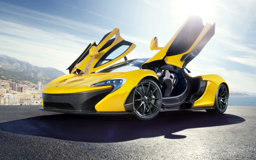

Generating prompts:  20%|██        | 15/75 [12:44<46:41, 46.69s/it]

a red sports car parked on the side of the road, award - winning 4 k photograph, fiery coloring, full body profile, inspired by Ai-Mitsu, profile posing, mclaren, photo from the back, backlight photo sample, aftermarket parts, victory lap, breathtaking colors


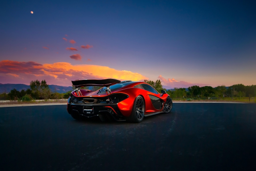

Generating prompts:  21%|██▏       | 16/75 [13:32<46:19, 47.12s/it]

File a red sports car parked on the side of the road, award - winning 4 k photograph, fiery coloring, full body profile, inspired.jpg already exists, trying 2...
a close up of the rear end of a sports car, wolff olins |, cinematic. futurism, black and orange, panda, photo”, palladium, hgh, that resembles a bull\'s, black oled background, 136412351, very perfect position, the jetsons, 1801446143


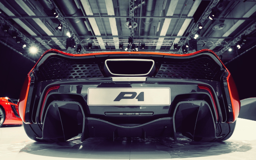

Generating prompts:  23%|██▎       | 17/75 [14:28<48:12, 49.88s/it]

File a close up of the rear end of a sports car, wolff olins , cinematic. futurism, black and orange, panda, photo, palladium, hg.jpg already exists, trying 2...
a close up of a sports car with open doors, award - winning 4 k photograph, shot at golden hour, by Adam Willaerts, mclaren, panoramic widescreen view, squatting pose, loadscreen”, spread wings, private collection, pointy shell, image split in half, full width


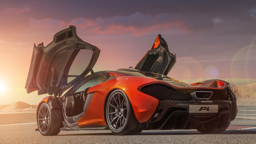

Generating prompts:  24%|██▍       | 18/75 [15:23<48:41, 51.25s/it]

File a close up of a sports car with open doors, award - winning 4 k photograph, shot at golden hour, by Adam Willaerts, mclaren,.jpg already exists, trying 2...
a black sports car driving on a race track, houzz, sheikh mohammed ruler of dubai, rear-shot, posed in profile, 500px photos, glowing-eyes-and-mouth, slender figure, black habit, standing in a stadium, by Adam Bruce Thomson, luxury lifestyle, outside enclosure


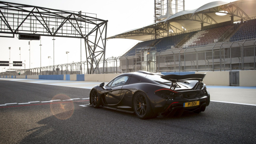

Generating prompts:  25%|██▌       | 19/75 [16:14<47:49, 51.23s/it]

File a black sports car driving on a race track, houzz, sheikh mohammed ruler of dubai, rear-shot, posed in profile, 500px photos.jpg already exists, trying 2...
a black sports car parked in front of a tunnel, dipped in polished blue ceramic, mclaren, best on wlop, prometheus, slate, phantom, by ridley scott, long blue-cape, auction catalogue photo, left - hand drive, muscled, asset, listing image, porches, obsidian


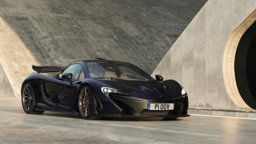

Generating prompts:  27%|██▋       | 20/75 [17:13<49:06, 53.58s/it]

File a black sports car parked in front of a tunnel, dipped in polished blue ceramic, mclaren, best on wlop, prometheus, slate, p.jpg already exists, trying 2...
a red sports car sitting on top of a white floor, orange to blue gradient, polished : :, in front of a black background, 3d animation, high speed, similar to the bifrost, justify content center, featured on dribble, cell shaded graphics


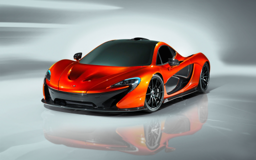

Generating prompts:  28%|██▊       | 21/75 [17:53<44:31, 49.48s/it]

an orange sports car driving through a tunnel, a screenshot of a rusty, promotional media, oled, long tail, sport, fast, transparent carapace, evokes delight, buttshape, black interface, desktop screenshot, full width, breeding


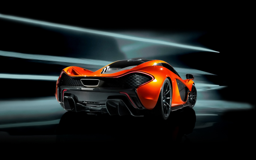

Generating prompts:  29%|██▉       | 22/75 [18:45<44:29, 50.38s/it]

File an orange sports car driving through a tunnel, a screenshot of a rusty, promotional media, oled, long tail, sport, fast, tra.jpg already exists, trying 2...
a black and red sports car on a black background, mclaren, red glowing skin, drooling, high definition render, aliased, veneno, similar to the bifrost, apple orange, has blood, with notes, photo render, blood thirsty, shadowed, flashy


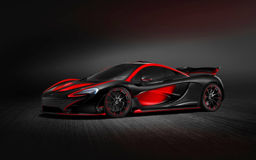

Generating prompts:  31%|███       | 23/75 [19:41<45:00, 51.93s/it]

a white sports car driving down a dirt road, octane trending on cgsociety, alterd carbon, detailed wings, mclaren, photo of, inspired by Kailash Chandra Meher, official print, by Kevin Connor, magazine centerfold, forged


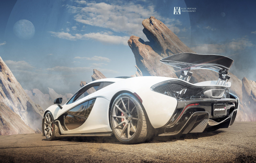

Generating prompts:  32%|███▏      | 24/75 [20:25<42:14, 49.69s/it]

a blue sports car on a black background, mclaren, polished : :, internals revealed, hdr lighting, best on wlop, porches, race


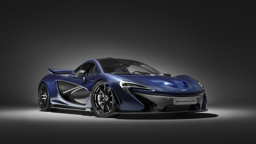

Generating prompts:  33%|███▎      | 25/75 [21:01<37:51, 45.43s/it]

a black sports car driving down a highway, unsplash transparent, with skin of obsidian, veneno, ( side ) profile, whip, with sleek lines and a powerful, npc with a saint's halo, trending on vehicle design, stride, race style, zoom out


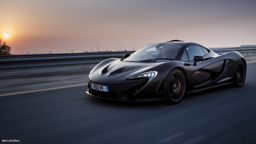

Generating prompts:  35%|███▍      | 26/75 [21:49<37:46, 46.26s/it]

a yellow sports car driving down a road, mclaren, 4 k high - resolution photograph, at full stride, header with logo, dueling, stunning large format photograph, hovering, liquid cooled, face shown, no watermark signature, voluptuous figure, listing image, looking sideways


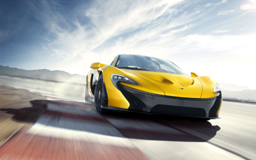

Generating prompts:  36%|███▌      | 27/75 [22:43<38:45, 48.44s/it]

a black sports car parked in a parking lot, awe - inspiring award - winning, mclaren, huhd - 8 k, portlet photo, nascar, highres, sexy-s 100, inspired by Penry Williams, justify content center, left - hand drive, made of glass, listing image, complete model, an insane, porches, beast


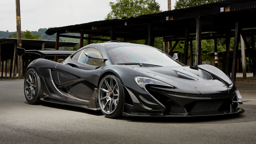

Generating prompts:  37%|███▋      | 28/75 [23:47<41:34, 53.09s/it]

a red sports car driving down a highway, mclaren, stunning armor, 4k wide lenses photograph, prometheus engineering, tuning, awe-inspiring. award-winnin, porches, by David Budd, left - hand drive, eyecandy, inspired by Petrus Van der Velden, optix, gritty tech, 8 0 0 t


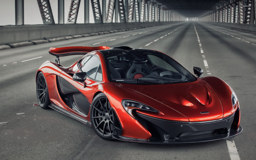

Generating prompts:  39%|███▊      | 29/75 [24:44<41:36, 54.28s/it]

a black sports car driving down a highway, unsplash transparent, with skin of obsidian, mclaren, with notes, smooth technology, featured on dribble, long sleek tail behind, overpowered, new vehicle, extremely polished


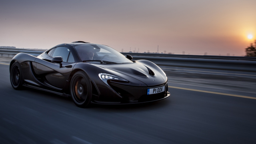

Generating prompts:  40%|████      | 30/75 [25:28<38:25, 51.24s/it]

File a black sports car driving down a highway, unsplash transparent, with skin of obsidian, mclaren, with notes, smooth technolo.jpg already exists, trying 2...
a black sports car driving down a desert road, explosive energy, high - definition, tapered hairline, taken from behind, veneno, ''dragon breathing fire, macroshot, electrifying, hunchbacked, photo, drooling, rear facing, full width, image, in front


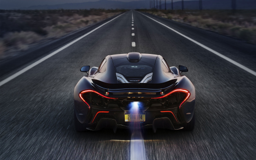

Generating prompts:  41%|████▏     | 31/75 [26:28<39:36, 54.00s/it]

a red sports car driving down a road, promotional images, iridescent specular highlights, mclaren, accompanying hybrid, hgh, inspired by Keos Masons, drooling, speedy aircraft, liquid cooled


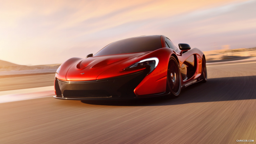

Generating prompts:  43%|████▎     | 32/75 [27:08<35:34, 49.64s/it]

a black sports car driving down a road, massive wings, 4 k high - resolution photograph, veneno, looking up into the sky, gulf, voluptuous and arousing, dueling, flamethrower, breeding, by Francis Helps, profile shot, detailed duck, mirrored, cars parked


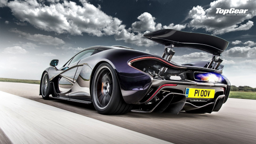

Generating prompts:  44%|████▍     | 33/75 [28:07<36:43, 52.46s/it]

a yellow sports car parked in front of an airplane, mclaren, gigantic monster, 2 0 2 2 photo, beast, 8 0 0 mm, full width, inspired by Jonathan Solter, posed in profile, portlet photo, crouching, highly capsuled, vents, carbon, hovering


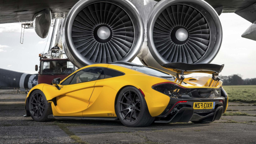

Generating prompts:  45%|████▌     | 34/75 [29:04<36:53, 53.99s/it]

a white and black sports car parked in front of a mountain, award - winning 4 k photograph, mclaren, huhd - 8 k, archviz, it has six thrusters in the back, oily substances, the photo shows a large, featured on unsplash, craftsmanship, nascar, liquid cooled


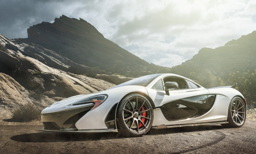

Generating prompts:  47%|████▋     | 35/75 [29:55<35:15, 52.89s/it]

a black sports car driving down a road at sunset, veneno, tall obsidian architecture, high - definition picture, featured on dribble, 5000k white product lighting, detailed face and body, with dramatic sky, breathtaking scenery, time exposure, hovering


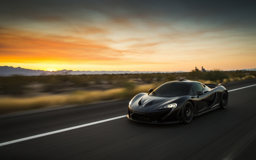

Generating prompts:  48%|████▊     | 36/75 [30:40<32:52, 50.57s/it]

a red sports car parked next to a body of water, highly detailed cgsociety, mclaren, popular on behance, realistic sky, low, very detailed skin, apple orange, illustration - n 9, long elegant tail, winged, photo high definition


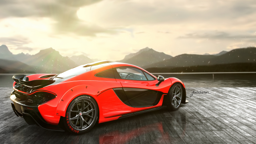

Generating prompts:  49%|████▉     | 37/75 [31:29<31:45, 50.14s/it]

an orange and black sports car on a black background, profile picture 1024px, supercar, highly detailed high resolution, computer graphics, voluptuous and arousing, orange grey white, drooling, winning illustration, listing image, blue orange, clear sharp image


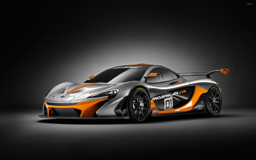

Generating prompts:  51%|█████     | 38/75 [32:15<30:10, 48.94s/it]

a red sports car driving on a race track, mclaren, wlop : :, quantum leap, photo bash, highend, liquid translucent amber, car, highly detailed illustration.”, featured on unsplash, left - hand drive, toonami, drag queen, ace of spades, seductive and powerful


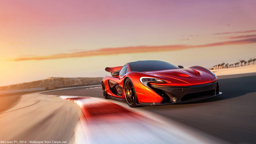

Generating prompts:  52%|█████▏    | 39/75 [33:15<31:15, 52.11s/it]

a red sports car driving down a city street, vfx powers at night in the city, mclaren, highly detailed - n 4, splash image, by Thomas Stuart Burnett, shot for imax, dark wet london alley at night, style of hydro74, left - hand drive, hd artwork


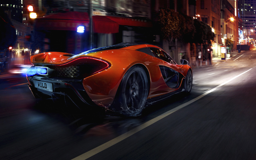

Generating prompts:  53%|█████▎    | 40/75 [33:58<28:56, 49.61s/it]

a red sports car driving on a race track, lorem ipsum dolor sit amet, archviz, apple car, mclaren, sakimichan hdri, beautiful panoramic imagery, heavily armoured, driving a hotrod, left - hand drive, photoreal details, extremely opulent, new vehicle, glass walls


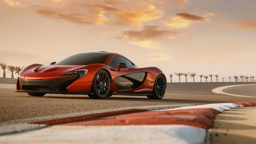

Generating prompts:  55%|█████▍    | 41/75 [34:54<29:07, 51.40s/it]

a red sports car driving down a winding road, mclaren, built in the egyptian desert, shot with canon 5 d mark ii, chiron, vast expansive landscape, magazine centerfold, centered full body rear-shot, metal scapes, stride, npc with a saint's halo, high altitude, at the top of a red rock canyon, inspired by Heinrich Maria Davringhausen


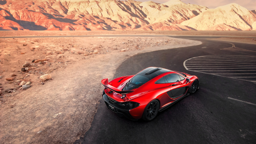

Generating prompts:  56%|█████▌    | 42/75 [35:45<28:15, 51.39s/it]

File a red sports car driving down a winding road, mclaren, built in the egyptian desert, shot with canon 5 d mark ii, chiron, va.jpg already exists, trying 2...
a black sports car driving down a country road, mclaren, wlop : :, cover story, (by tom purvis), veneno, zoom out, in flight, inspired by ridley scott, english countryside, high forehead, pictured from the shoulders up, overpowered, high altitude, driving


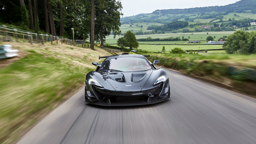

Generating prompts:  57%|█████▋    | 43/75 [36:42<28:15, 52.97s/it]

a close up of a red and black sports car, largest haunches ever, by Arthur Pan, veneno, image split in half, detailed –n 9, slender symmetrical body, bent over posture, 4 k editorial photograph, intimidating lighting, by Eugène Brands, flamethrower


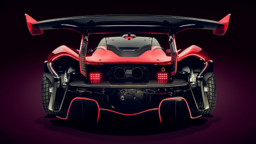

Generating prompts:  59%|█████▊    | 44/75 [37:31<26:48, 51.88s/it]

a black sports car parked on the side of the road, unsplash transparent, spreading her wings, liquid cooled, james yang, all in the amazing outdoors view, veneno, listing image, photoreal details, mclaren, armored!, detailed 1000k, on the coast, ocean swells


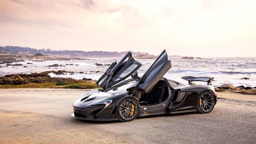

Generating prompts:  60%|██████    | 45/75 [38:27<26:28, 52.95s/it]

a black sports car parked in a parking lot, awe - inspiring award - winning, arabian beauty, by Patrick Adam, mclaren, inspired by Hugh William Williams, taken with a canon eos 5d, shell, canyons, front back view and side view, spreading her wings, ace of spades


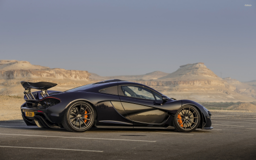

Generating prompts:  61%|██████▏   | 46/75 [39:15<24:53, 51.49s/it]

a red sports car driving on a race track, paler. millions of glass-walled, orange gradient, massive battery, black widow, mega-beautiful pencil shadowing, 16 thousand - n 6, front photo, breeding, taken with a canon eos 5d, sleek armor, with notes, photo render, high definition photograph, sleipnir


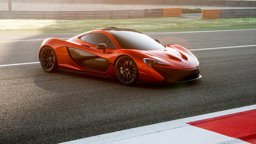

Generating prompts:  63%|██████▎   | 47/75 [40:13<24:55, 53.40s/it]

a red and black sports car with its doors open, mclaren, best photos of the year, best on wlop, by Adam Willaerts, smaug, by Ryan Barger, huge highly detailed wings, listing image, widescreen shot, by Adam Bruce Thomson, imagenet, liquid cooled, auto and design magazine, 2 0 2 2 photo, red tailcoat


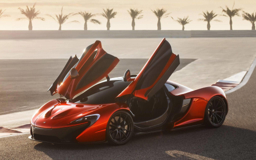

Generating prompts:  64%|██████▍   | 48/75 [41:11<24:38, 54.77s/it]

a black and white sports car driving on a track, fine cyborg lace, mclaren, felipe pantone, wings of a swan, ink blot, high-definition photograph, black and white), full - body art, launch test, patterned, wrapped, scribbled, asset, by John Button, eyecandy


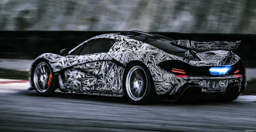

Generating prompts:  65%|██████▌   | 49/75 [42:11<24:30, 56.54s/it]

a red sports car driving down a road at night, next gen game, prowling through the forest, the video game, driving, veneno, orange and cyan lighting, caught in 4k, the rift, over the hills, aspen grove in the background, next-gen graphics, highway 5 0, moutains


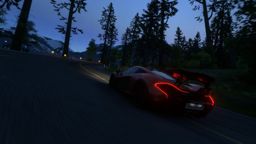

Generating prompts:  67%|██████▋   | 50/75 [43:06<23:20, 56.03s/it]

a red sports car driving on a race track, still from the movie ex machina, promotional render, golden hour photograph, wlop and andrei riabovitchev, speedy aircraft, full width, orange dawn, associated press photography, inspired by Robert J. Brawley, left - hand drive, half rear lighting


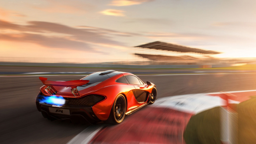

Generating prompts:  68%|██████▊   | 51/75 [43:55<21:32, 53.84s/it]

a black sports car driving down a road, mclaren, prowling through the forest, in 2 0 1 8, extreme facial detail, glass paint, high resolution auction photo, asset, ( side ) profile, aerodynamic imposing, spectres, lightweight but imposing, granite, racing


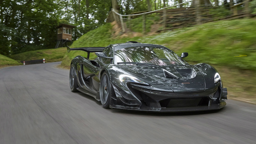

Generating prompts:  69%|██████▉   | 52/75 [44:49<20:41, 53.97s/it]

a white and black sports car parked in front of a mountain, paler. millions of glass-walled, apple orange, sleek visor, autodesk, speedy aircraft, hgh resolution, by Francis Helps, top-rated


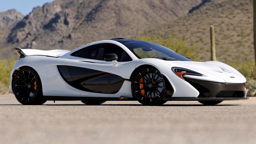

Generating prompts:  71%|███████   | 53/75 [45:27<17:58, 49.01s/it]

a black sports car driving on a race track, featured on pexels, npc with a saint's halo, shining golden hour, refined nose, the glimmering orange dawn, luxurious, obsidian metal, modern car design


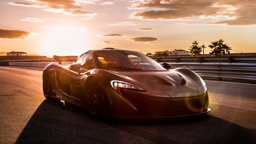

Generating prompts:  72%|███████▏  | 54/75 [46:05<16:00, 45.75s/it]

a red sports car parked in a garage, mclaren, wlop and andrei riabovitchev, clear glass, busy room, holy machine, lurking, f11, industrial surrounding, in warehouse, adobe eps, left - hand drive, right align


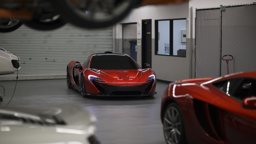

Generating prompts:  73%|███████▎  | 55/75 [46:55<15:41, 47.08s/it]

a yellow sports car with its doors open, the image is refined with uhd, mclaren, epic diptych, trending on pinterest, stp, anamorphic wide angle lens, with two pairs of wings, as well as scratches, ace of spades, listing image, race style, glass cover


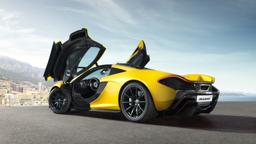

Generating prompts:  75%|███████▍  | 56/75 [47:46<15:17, 48.29s/it]

a red sports car parked on the side of a road, beautiful panoramic imagery, mclaren, symmetrical dragon wings, 2 0 5 0 s, in the desert beside the gulf, model posing, in a sunbeam, luxury lifestyle, npc with a saint's halo, topdown, daytoner, photo of a model, 3 doors, ultra-high definition


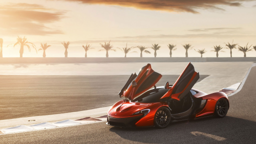

Generating prompts:  76%|███████▌  | 57/75 [48:44<15:22, 51.28s/it]

a black sports car parked in front of a building, exquisite and handsome wings, backshot, silicon and carbon, curvy model, high - definition picture, most popular, with notes, obsidian metal, distinct horizon, by Oliver Sin, macroshot, oven, noot noot, grid layout


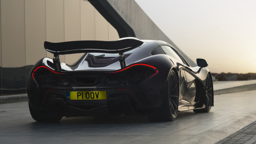

Generating prompts:  77%|███████▋  | 58/75 [49:42<15:05, 53.27s/it]

an orange and black sports car on a reflective surface, paler. millions of glass-walled, promotional render, wrapped blue background, the new love, splash page, veneno, wide screenshot, has black wings, ultra hd rendered, stride


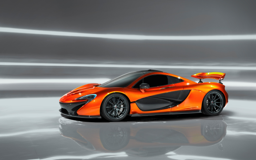

Generating prompts:  79%|███████▊  | 59/75 [50:26<13:28, 50.54s/it]

a red and black sports car parked in front of a house, mclaren, highly detailed in 4 k ”, forged, cory behance hd, pod racer, kicking a florida mansion, craftsmanship, by Matthew D. Wilson, made of glass, maroon red, eyecandy, magazine centerfold, winged, stunningly


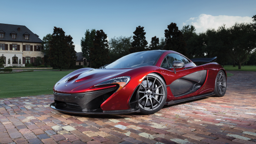

Generating prompts:  80%|████████  | 60/75 [51:29<13:34, 54.27s/it]

File a red and black sports car parked in front of a house, mclaren, highly detailed in 4 k , forged, cory behance hd, pod racer,.jpg already exists, trying 2...
a black sports car driving on a race track, mclaren, sony a7r -, crouching humanoid, noot noot, 500px photos, tail raised, by David Young Cameron, by William Morris, macroshot, at takeoff, by Jim Davis, muscled, 24 mm shot, automobile, listing image, ace of spades, old abbey in the background


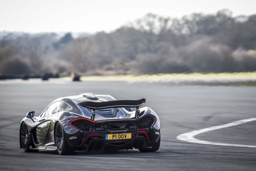

Generating prompts:  81%|████████▏ | 61/75 [52:34<13:23, 57.38s/it]

a black sports car parked inside of a building, highly detailed studio lighting, wlop : :, in a dark warehouse, veneno, grid, subaquatic photography, crouching humanoid, trending on interfacelift, beautiful high detail photo, dungeon, bumblebee, imperial, opulent


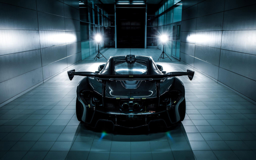

Generating prompts:  83%|████████▎ | 62/75 [53:27<12:08, 56.03s/it]

an orange sports car with its doors open, nvidia promotional image, unreal engine 5 renderered, mclaren, hangar, 5d, cfg=50, in-game 3d model, diego 5, sun shines down on the car, upscale photo, promotional render, featured on ign, playstion 5 screen, listing image, highly photographic render


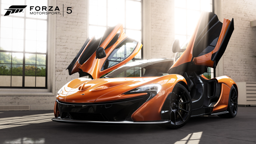

Generating prompts:  84%|████████▍ | 63/75 [54:28<11:31, 57.61s/it]

File an orange sports car with its doors open, nvidia promotional image, unreal engine 5 renderered, mclaren, hangar, 5d, cfg50, .jpg already exists, trying 2...
a black sports car driving down a road, mclaren, 4 k high - resolution photograph, mega death, magnificent oval face, drool, inspired by Tom Scott RSA, huge highly detailed wings, getty images, black fedora, the cars have faces


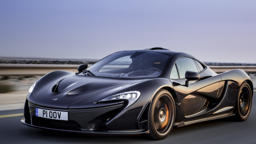

Generating prompts:  85%|████████▌ | 64/75 [55:12<09:47, 53.39s/it]

a red sports car driving down a desert road, mclaren, wlop : :, total recall style, backshot, inspired by Fathi Hassan, mean, vsx, high - definition picture, epic view, full profile, avatar image, getty images, stunning sasquatch, vertical symmetry, victory lap, oman, by Adam Willaerts, luxury lifestyle


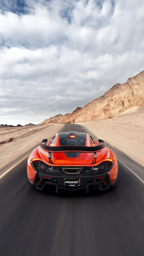

Generating prompts:  87%|████████▋ | 65/75 [56:22<09:44, 58.49s/it]

a black sports car driving down a highway, arabic pronunciation: [kaʕ.bah]), 500px photos, mclaren, in the golden hour, in front of a black background, with skin of obsidian, pulling the move'the banshee ', powering up, highly capsuled, skyline


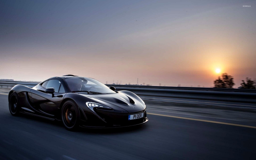

Generating prompts:  88%|████████▊ | 66/75 [57:10<08:18, 55.37s/it]

a red and black sports car with its doors open, trending on dribble, mclaren, best on wlop, uv, bat wings, quantum leap, red, glowing red laser eyes, very nerdy, optic ripple, 2 0 5 0 s, left - hand drive, oled, of augean stables, turrets, amazing graphics


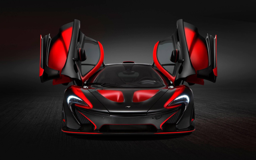

Generating prompts:  89%|████████▉ | 67/75 [58:14<07:43, 57.97s/it]

a yellow sports car with its doors open, mclaren, highly detailed in 4 k ”, curated collections, hovering in the air, black armor with yellow accents, image overlays, elongated arms, azure, overhead canopy, oled, editor’s pickup, splash page, breeding


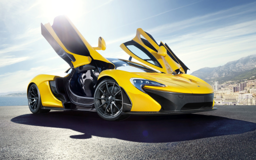

Generating prompts:  91%|█████████ | 68/75 [59:13<06:46, 58.08s/it]

a couple of cars that are next to each other, volumetric lighting”, blue flames surrounding, wheel, sportcar, curved red arrow, by Adam Bruce Thomson, demon tail, cutscene footage, cougar in forest at night, sportscar, featured in cinematic, streamlined spines


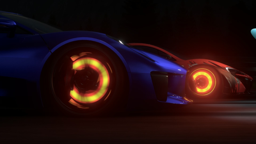

Generating prompts:  92%|█████████▏| 69/75 [1:00:08<05:43, 57.28s/it]

a black sports car driving down a desert road, still frame from a movie, mclaren, veneno, unobstructed road, splash screen, to infinity and beyond, full width, by Xu Wei, pexels, the batman, bmw, listing image, banshee


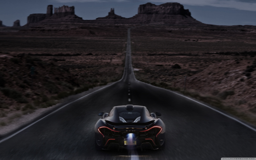

Generating prompts:  93%|█████████▎| 70/75 [1:01:03<04:42, 56.47s/it]

a black sports car parked in a garage, wallpaper for monitor, extreme detailed face, tilt blur, mclaren, haunting eyes, tumblr, black-and-white, ps 3 graphics, the cars have faces, dark blue, modded, staggering in its beauty, inspired by Terrell James, optix, racecar, made of smooth black goo


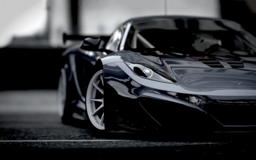

Generating prompts:  95%|█████████▍| 71/75 [1:02:06<03:53, 58.49s/it]

a black sports car driving down a highway, unsplash transparent, with skin of obsidian, mclaren, most popular, long tail, stride, breathtaking scenery, narrow wings behind, listing image


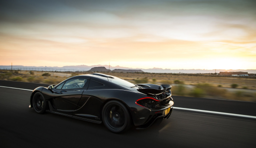

Generating prompts:  96%|█████████▌| 72/75 [1:02:46<02:39, 53.04s/it]

a yellow sports car parked on the side of a road, colors of tron legacy, dark storm clouds above, mclaren, metal surfaces, hgh, anonymous as a car, lit up, high-definition photograph, beyond the horizon, car commercial photograph


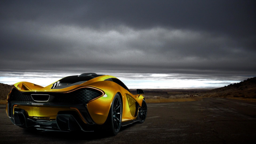

Generating prompts:  97%|█████████▋| 73/75 [1:03:30<01:40, 50.34s/it]

a black sports car driving down a winding road, mclaren, flat desert, absurdly beautiful, drag, power stance, highres, drool, crisp contour - lines, listing image, granite, crawling on the ground, hard predatory look, as well as scratches


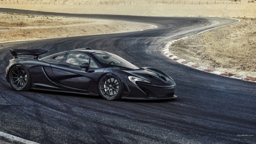

Generating prompts:  99%|█████████▊| 74/75 [1:04:23<00:51, 51.08s/it]

a close up of the front of a red sports car, award - winning 4 k photography, panoramic anamorphic, mclaren, dubai, photo taken with sony a7r camera, by Nathan Wyburn, nascar race, highly polished, left - hand drive, today's featured photography 4k, detailed duck, bespoke


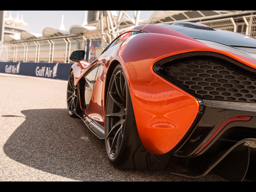

Generating prompts: 100%|██████████| 75/75 [1:05:14<00:00, 52.19s/it]





Generated 75 prompts and renamed your files, enjoy!


In [4]:
#@title Batch process a folder of images 📁 -> 📝

#@markdown This will generate prompts for every image in a folder and either save results 
#@markdown to a desc.csv file in the same folder or rename the files to contain their prompts.
#@markdown The renamed files work well for [DreamBooth extension](https://github.com/d8ahazard/sd_dreambooth_extension)
#@markdown in the [Stable Diffusion Web UI](https://github.com/AUTOMATIC1111/stable-diffusion-webui).
#@markdown You can use the generated csv in the [Stable Diffusion Finetuning](https://colab.research.google.com/drive/1vrh_MUSaAMaC5tsLWDxkFILKJ790Z4Bl?usp=sharing)

import csv
import os
from IPython.display import clear_output, display
from PIL import Image
from tqdm import tqdm

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

folder_path = "/content/gdrive/MyDrive/p1" #@param {type:"string"}
prompt_mode = 'best' #@param ["best","fast","classic","negative"]
output_mode = 'rename' #@param ["desc.csv","rename"]
max_filename_len = 128 #@param {type:"integer"}


def sanitize_for_filename(prompt: str, max_len: int) -> str:
    name = "".join(c for c in prompt if (c.isalnum() or c in ",._-! "))
    name = name.strip()[:(max_len-4)] # extra space for extension
    return name

ci.config.quiet = True

files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')] if os.path.exists(folder_path) else []
prompts = []
for idx, file in enumerate(tqdm(files, desc='Generating prompts')):
    if idx > 0 and idx % 100 == 0:
        clear_output(wait=True)

    image = Image.open(os.path.join(folder_path, file)).convert('RGB')
    prompt = image_to_prompt(image, prompt_mode)
    prompts.append(prompt)

    print(prompt)
    thumb = image.copy()
    thumb.thumbnail([256, 256])
    display(thumb)

    if output_mode == 'rename':
        name = sanitize_for_filename(prompt, max_filename_len)
        ext = os.path.splitext(file)[1]
        filename = name + ext
        idx = 1
        while os.path.exists(os.path.join(folder_path, filename)):
            print(f'File {filename} already exists, trying {idx+1}...')
            filename = f"{name}_{idx}{ext}"
            idx += 1
        os.rename(os.path.join(folder_path, file), os.path.join(folder_path, filename))

if len(prompts):
    if output_mode == 'desc.csv':
        csv_path = os.path.join(folder_path, 'desc.csv')
        with open(csv_path, 'w', encoding='utf-8', newline='') as f:
            w = csv.writer(f, quoting=csv.QUOTE_MINIMAL)
            w.writerow(['image', 'prompt'])
            for file, prompt in zip(files, prompts):
                w.writerow([file, prompt])

        print(f"\n\n\n\nGenerated {len(prompts)} prompts and saved to {csv_path}, enjoy!")
    else:
        print(f"\n\n\n\nGenerated {len(prompts)} prompts and renamed your files, enjoy!")
else:
    print(f"Sorry, I couldn't find any images in {folder_path}")
